In [6]:
import sys
import numpy as np
sys.path.append('../src/')

from ap3 import *

x = np.arange(10)
y = x ** 2
_ = plot(x, y, marker='_o')
print(plot(x, 30. - y, marker='_s', xticks_to_int=False, yticks_to_int=False))



 +0.046 +9 +1.7 +80 


  ∧                                               
  │+80                                         ○  
  ┼                                               
  │                                               
  │                                               
  │                                       ○       
  │                                               
  │                                               
  │                                  ○            
  │                                               
  │                                               
  │                             ○                 
  │                                               
  │                        ○                      
  │                                               
  │                   ○                           
  │              ○                                
  │+1.7     ○                                     
──┼────○───────────────────────────────────────┼─>
  ┼+0.

In [1]:
import sys
sys.path.append('../src/')

from docopt import docopt
from config import Config
from builder import RepertoireBuilder

doc = """Usage:
    main.py <config_file>

Arguments:
    <config_file>   Path to YAML configuration file
"""


def main():
    config = Config("example.yaml")

    builder = RepertoireBuilder(config)
    return builder.GenerateReportoire()


In [2]:
df = main()


		START


( 0m0s )  -------  1   b1a3   Starting move 
 r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
N . . . . . . .
P P P P P P P P
R . B Q K B N R
#CandidateMoves:  4

( 0m6s )  -------  2   e7e5   34% (20426) -- -0.59 -- 53/3/42 
 r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . . . . .
N . . . . . . .
P P P P P P P P
R . B Q K B N R
#CandidateMoves:  1

( 0m10s )  -------  3   e2e3   23% (4743) -- -0.9 -- 69/2/28 
 r n b q k b n r
p p p p . p p p
. . . . . . . .
. . . . p . . .
. . . . . . . .
N . . . P . . .
P P P P . P P P
R . B Q K B N R


KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
df

,ply,move,IsWhiteToMove,whitePerc,drawPerc,blackPerc,totGames,percGames,engineEval
0,2,e5,False,53,3,42,20426,34,-0.59
1,3,e3,True,69,2,28,4743,23,-0.90
2,4,Bxa3,False,73,2,24,2166,42,-0.45
3,5,bxa3,True,73,2,24,2161,99,-0.13
4,6,Nf6,False,70,2,26,809,37,-0.30
...,...,...,...,...,...,...,...,...,...
64,4,Nf6,False,64,3,31,261,11,-0.09
65,5,d4,True,66,0,33,45,5,-0.48
66,6,d5,False,54,2,43,46,38,-0.36
67,6,Bxa3,False,45,2,51,35,29,-99.99


In [5]:
w = df[df['IsWhiteToMove']]
b = df[df['IsWhiteToMove'] == False]

([<matplotlib.axis.XTick at 0x145465c90>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6')])

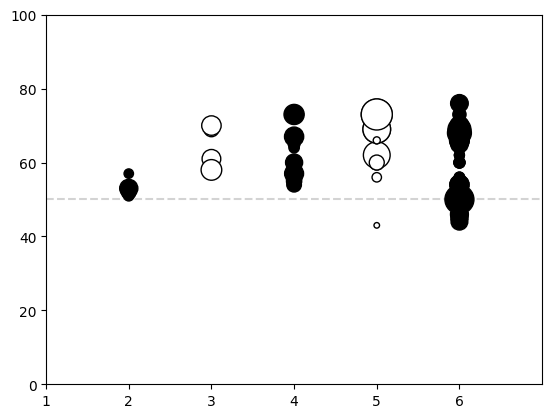

In [6]:
# Aggiunta di una linea orizzontale al valore 0
linea = plt.axhline(50, color='lightgray', linestyle='--')
linea.set_zorder(-1)  # Imposta il valore di z-order per mettere la linea in secondo piano

# plt.scatter(w['ply'], w['whitePerc'], marker='o', edgecolors='black', facecolors='white',s=np.log10(w['totGames'])*50)
# plt.scatter(b['ply'], b['whitePerc'], marker='o', edgecolors='black', facecolors='black',s=np.log10(b['totGames'])*50)
plt.scatter(w['ply'], w['whitePerc'], marker='o', edgecolors='black', facecolors='white',s=w['percGames']*5+1)
plt.scatter(b['ply'], b['whitePerc'], marker='o', edgecolors='black', facecolors='black',s=b['percGames']*5+1)

plt.ylim(0,100)
plt.xlim(1,df['ply'].max()+1)
plt.xticks(np.arange(1, df['ply'].max()+1, 1))

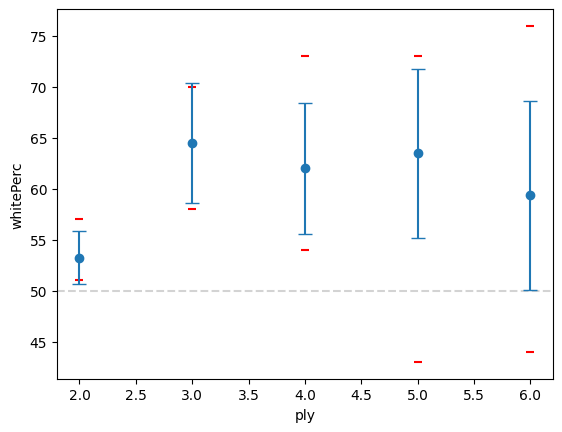

In [7]:
grouped = df.groupby('ply')['whitePerc'].agg(['mean', 'min', 'max', 'count', 'std'])

linea = plt.axhline(50, color='lightgray', linestyle='--')

plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', capsize=5, label='Mean')
plt.scatter(grouped.index, grouped['min'], marker='_', color='r', label='Min')
plt.scatter(grouped.index, grouped['max'], marker='_', color='r', label='Max')

plt.xlabel('ply')
plt.ylabel('whitePerc')

plt.show()

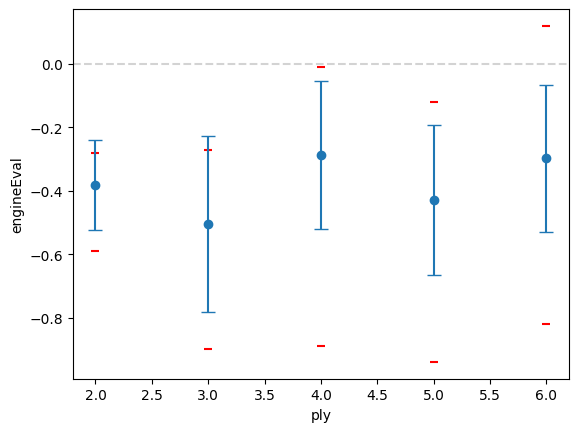

In [8]:
grouped = df[df['engineEval'] > -10].groupby('ply')['engineEval'].agg(['mean', 'min', 'max', 'count', 'std'])

linea = plt.axhline(0, color='lightgray', linestyle='--')

plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', capsize=5, label='Mean')
plt.scatter(grouped.index, grouped['min'], marker='_', color='r', label='Min')
plt.scatter(grouped.index, grouped['max'], marker='_', color='r', label='Max')

plt.xlabel('ply')
plt.ylabel('engineEval')

plt.show()

In [12]:
#plt.errorbar(grouped.index, grouped['mean'], yerr=grouped['std'], fmt='o', capsize=5, label='Mean')
p = AFigure(shape=(30, 20), xlabel="PIPPO")
zero_line = np.full(len(grouped.index), 0.0)
_ = p.plot(grouped.index, zero_line, marker='-',plot_slope=True)
#print(_)
g = p.plot(grouped.index, grouped['mean'],ylim=[0,1.01], marker=',')
print(g)

TypeError: AFigure.add_axes_labels() takes from 1 to 4 positional arguments but 5 were given

In [ ]:
h = hist(df['ply'],histtype='None', return_str=True, shape=(30, 20), plot_labels=True)

In [ ]:
print(h)

 │                            
 ┼+29.67                    ∘ 
 │                            
 │                            
 │                            
 │                            
 │                            
 │                            
 │                            
 │                            
 │                   ∘  ∘     
 │                            
 │                            
 │                            
 │                            
 │                            
 │         ∘   ∘              
 ┼+0.63                       
─┼───────────∘───∘─∘──∘───∘─┼─
 │+0.03             +5.78477  


In [ ]:
def align_strings(str1, str2):
    lines1 = str1.split('\n')
    lines2 = str2.split('\n')

    for l1, l2 in zip(lines1, lines2):
        # Pad each line with spaces to ensure they are all 50 characters long
        l1 = l1.ljust(40)
        l2 = l2.ljust(40)

        # Combine the three lines and print them
        print(f"{l1}{l2}")

# Example usage:
string1 = "This is the first string\nwith multiple lines\ncontaining \t and \n characters."
string2 = "The second string\nalso has\ttabs\nand newlines."
string3 = "Finally, the third string\nends here."

align_strings(g, h)


 │                                       │                                      
 ┼+1                                     ┼+29.67                    ∘           
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                                      
 │                                       │                   ∘  ∘               
 │                                       │                                      
 │                          